In [ ]:
import nltk 
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# convert to pandas 
df=pd.read_csv('https://raw.githubusercontent.com/aadarshachapagain/DataForAnalyis/main/airline_review_training_data.csv')
df.head()

,text,airline_sentiment
0,@USAirways BF has been stuck in CLT all day. I...,0
1,@united DM sent. This lack if customer servic...,0
2,@JetBlue thank you for the information.,1
3,@AmericanAir I DMed you my AA &amp; phone #s &...,0
4,@united @44Stocker my wife Sarah stocker did a...,0


In [ ]:
# taking a sample of data
df['document']=df['text']
df = df.drop('text', 1)
# sample_data = df.tail(2000)
sample_data = df
print("shape:",df.shape)
df.head()

shape: (8078, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,airline_sentiment,document
0,0,@USAirways BF has been stuck in CLT all day. I...
1,0,@united DM sent. This lack if customer servic...
2,1,@JetBlue thank you for the information.
3,0,@AmericanAir I DMed you my AA &amp; phone #s &...
4,0,@united @44Stocker my wife Sarah stocker did a...


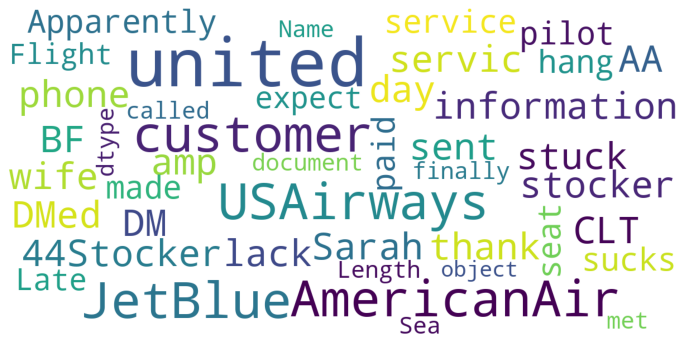

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        # stopwords=stopwords,
        max_words=7000,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['document'])

In [ ]:
# get stop words
# from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# lower case

sample_data1 = (
    # start with training data
    sample_data
    # convert to lower case
    .assign(clean_document= lambda x:[text.lower() for text in x.document]) 
    # remove punctuation
    .assign(clean_document= lambda x: [re.sub("[^\w\s]","",text) for text in x.clean_document])
     # remove numbers
    .assign(clean_document= lambda x: [re.sub("\d","",text) for text in x.clean_document])
    # remove leading & trainling spaces 
    .assign(clean_document = lambda x: [text.strip() for text in x.clean_document])
    # remove all the '\n' values with space
    .assign(clean_document= lambda x: [re.sub(r"\n","",text) for text in x.clean_document] )
    # word tokenize
    .assign(clean_document= lambda x: [re.sub(r"[^A-Za-z]+"," ",text) for text in x.clean_document])
    .assign(word_token= lambda x: [nltk.word_tokenize(text) for text in x.clean_document] )
    # # remove stop words
    .assign(word_token= lambda x: [list(set(list_of_words).difference(stop_words)) for list_of_words in x.word_token])
    # Lemmatising the words
    # .assign(word_token= lambda x: [[lem.lemmatize(a_word) for a_word in list_of_words] for list_of_words in x.word_token ])
    #  # input to sklearn
    # .assign(document_to_sklearn= lambda x: [" ".join(map(str,list_of_words)) for list_of_words in x.word_token ])
)

In [ ]:
sample_data1

,airline_sentiment,document,clean_document,word_token
0,0,@USAirways BF has been stuck in CLT all day. I...,usairways bf has been stuck in clt all day is ...,"[tequila, clt, offering, stuck, day, amp, cry,..."
1,0,@united DM sent. This lack if customer servic...,united dm sent this lack if customer service i...,"[getting, lack, customer, service, united, rid..."
2,1,@JetBlue thank you for the information.,jetblue thank you for the information,"[thank, jetblue, information]"
3,0,@AmericanAir I DMed you my AA &amp; phone #s &...,americanair i dmed you my aa amp phone s amp y...,"[resolve, didnt, someone, cant, dmed, amp, cal..."
4,0,@united @44Stocker my wife Sarah stocker did a...,united stocker my wife sarah stocker did also ...,"[could, also, connect, customer, stocker, sara..."
...,...,...,...,...
8073,0,@JetBlue Apparently the pilot had made some an...,jetblue apparently the pilot had made some ann...,"[losing, trouble, pilot, apparently, quickly, ..."
8074,0,@united customer service sucks! They hang up ...,united customer service sucks they hang up aft...,"[hang, customer, service, hour, united, talkin..."
8075,0,@USAirways I paid for my seat. I expect to be...,usairways i paid for my seat i expect to be ab...,"[seat, expect, use, usairways, able, paid, full]"
8076,0,"@united so, not only were you Late Flight, you...",united so not only were you late flight you br...,"[broke, flight, one, handle, paying, late, htt..."


In [ ]:
sent_list = list(sample_data1.word_token)
from gensim.models import Word2Vec
 

In [ ]:
model = Word2Vec(sentences=sent_list, size=100, window=2, min_count=1,sg=1)
# predict_words= model.predict_output_word(['upgrade','accomodation','stay','information'])
# predict_words

In [ ]:
vector = model.wv['free']
print("shape:",vector.shape)
vector


shape: (100,)


array([ 0.10611089, -0.01489109,  0.04247376,  0.1779099 ,  0.17026359,
       -0.05173115,  0.3724207 ,  0.32122827, -0.09729197, -0.05861048,
        0.20548666,  0.07890587, -0.16608176,  0.03162007, -0.09538927,
       -0.17662711, -0.17335933,  0.48504248,  0.12885244,  0.07874983,
        0.25836623,  0.11072875, -0.11545748, -0.558295  , -0.16134246,
       -0.40396243,  0.13425319, -0.26198703, -0.19984789, -0.11705697,
       -0.2927834 ,  0.36072156, -0.19413571, -0.11274619,  0.15426616,
        0.05109435,  0.17638688,  0.02048562, -0.13307276,  0.16213648,
        0.18585232,  0.330145  , -0.3716805 ,  0.2953905 , -0.04301393,
       -0.01647654,  0.04560407, -0.25916272,  0.46942526,  0.14516112,
        0.2939995 , -0.01738129,  0.0231555 ,  0.06063829, -0.22435306,
       -0.03846556,  0.23357683,  0.09541306,  0.02652946,  0.14147158,
       -0.311987  , -0.12342422,  0.24538691,  0.08865137,  0.20064881,
        0.2553929 , -0.05812494,  0.25604913, -0.01701153,  0.11

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

arr = model.wv.most_similar('free', topn=3)
# list of similar words
word_list = [x[0] for x in arr ]
print("similar words are:",word_list)
# vectors of similar words 
vectors = [model.wv[word] for word in word_list]
df = pd.DataFrame(vectors)
# dimensonality reduction
pca = PCA(2)
pca_d = pca.fit_transform(df)
df1 = pd.DataFrame(pca_d,index=df.index)
# figure
fig = px.scatter( x=df[0], y=df[1],color=word_list)
fig.show()


similar words are: ['point', 'information', 'coming']


In [ ]:
def gen_smlr_wrds(sentences=sent_list, size=30, window=2, min_count=1,sg=1,pca_cnt=2,word='free',topn=5):
  model = Word2Vec(sentences=sent_list, size=30, window=2, min_count=1,sg=1)
  # vector = model.wv[word]
  arr = model.wv.most_similar(word, topn=3)
  # list of similar words
  word_list = [x[0] for x in arr ]
  print('Word Closest to {word} are {word_list}'.format(word=word,word_list=word_list))
  # vectors of similar words 
  vectors = [model.wv[word] for word in word_list]

  df = pd.DataFrame(vectors)
  # dimensonality reduction
  pca = PCA(pca_cnt)
  pca_d = pca.fit_transform(df)
  df1 = pd.DataFrame(pca_d,index=df.index)
  # figure
  fig = px.scatter( x=df[0], y=df[1],color=word_list)
  fig.show()
  return True

gen_smlr_wrds(sentences=sent_list, size=30, window=2, min_count=1,sg=1,pca_cnt=2,word='free',topn=5)

Word Closest to free are ['employees', 'seems', 'mean']


True

In [ ]:
gen_smlr_wrds(sentences=sent_list, size=30, window=2, min_count=1,sg=1,pca_cnt=3,word='wife',topn=5)

Word Closest to wife are ['almost', 'available', 'board']


True

In [ ]:
gen_smlr_wrds(sentences=sent_list, size=30, window=2, min_count=1,sg=1,pca_cnt=3,word='sucks',topn=5)

Word Closest to sucks are ['dealing', 'appreciated', 'ice']


True

In [ ]:
gen_smlr_wrds(sentences=sent_list, size=30, window=2, min_count=1,sg=1,pca_cnt=3,word='trash',topn=5)

Word Closest to trash are ['fixed', 'suppose', 'traveling']


True

In [ ]:
gen_smlr_wrds(sentences=sent_list, size=30, window=3, min_count=1,sg=3,pca_cnt=2,word='free',topn=5)

Word Closest to free are ['b', 'coming', 'assistance']


True

In [ ]:
gen_smlr_wrds(sentences=sent_list, size=30, window=3, min_count=1,sg=3,pca_cnt=2,word='sucks',topn=5)

Word Closest to sucks are ['mess', 'appreciated', 'crazy']


True

In [ ]:
gen_smlr_wrds(sentences=sent_list, size=100, window=3, min_count=1,sg=1,pca_cnt=2,word='airline',topn=5)

Word Closest to airline are ['would', 'ive', 'cancelled']


True

In [ ]:
#################################################### END  ###############################################################
#################################################### END  ###############################################################
#################################################### END  ###############################################################
#################################################### END  ###############################################################
#################################################### END  ###############################################################


In [ ]:
from collections import defaultdict

def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing (use tokenizer instead)
        text = text.lower().split()
        # iterate over sentences
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1
    
    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df

In [ ]:
text = sample_data1['document_to_sklearn']
df = co_occurrence(text, 2)
df_original =df
df.head()

,aa,aaadvantage,aacom,aadelay,aadfw,aadv,aadvantage,aafail,aal,aampc,...,zero,zigzagging,zippers,zkatcher,zone,zones,zoom,zrh,zukes,zurich
aa,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaadvantage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aacom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aadelay,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aadfw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA
# pca = PCA(0.85)
pca = PCA(5)
pca_d = pca.fit_transform(df)
pca_d.shape
df1 = pd.DataFrame(pca_d,index=df.index,columns=['pca1','pca2','pca3','pca4','pca5'])


In [ ]:
pca.explained_variance_ratio_
# first column pca1 is capturing 34 percent of variance or usefulness of dataset

array([0.46343237, 0.16469426, 0.11258664, 0.04650855, 0.02465098])

In [ ]:
df1

,pca1,pca2,pca3,pca4,pca5
aa,18.417347,-5.466027,5.353396,5.589354,8.800289
aaadvantage,-1.436548,-0.221342,-0.411889,-0.627025,-0.302799
aacom,-1.548815,-0.084088,-0.031469,-0.039944,-0.083846
aadelay,-1.494920,-0.077565,-0.042436,-0.089576,0.007851
aadfw,-1.684934,-0.146218,-0.472273,-0.413844,-0.162122
...,...,...,...,...,...
zones,-1.620130,-0.139918,-0.522366,-0.469485,-0.145660
zoom,-1.559574,-0.075751,-0.066173,-0.031493,-0.074988
zrh,-0.764364,-0.325693,-0.971593,0.010191,-0.049483
zukes,-1.283216,0.364739,-0.687578,-0.253821,-0.050229


In [ ]:
import numpy as np
from numpy.linalg import norm


def find_match(word:string,df:dict,n=10,sort_by=['euclidean'],sort_order:bool=True):
  y = df.loc[word]
  euc_dist_lst =[]
  cosine_lst =[]
  for index, row in df.iterrows():
    # Euclidean distance
    euc_dist_lst.append(np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(row, y)])))
    row_numpy = row.to_numpy()
    word_numpy =y.to_numpy()
    # Cosine Similarity
    cosine_res = np.dot(row_numpy,word_numpy)/(norm(row_numpy)*norm(word_numpy))
    cosine_lst.append(cosine_res)
  df['euclidean']=euc_dist_lst
  df['cosine']=cosine_lst

  print("Sorted by: ",sort_by)
  df.sort_values(by =sort_by,inplace=True,ascending=sort_order)
  result =df.head(n)
  return result



dff_euclidean =find_match('free',df=df1, n=5,sort_by=['euclidean'])
print("dff_euclidean:\n",dff_euclidean)
print("---------------------------")
dff_cosine =find_match('free',df=df1, n=5,sort_by=['cosine'],sort_order=False)
print("dff_cosine:\n",dff_cosine)










Sorted by:  ['euclidean']
dff_euclidean:
               pca1      pca2      pca3      pca4      pca5  euclidean  \
free     19.571013  1.678240 -4.136864  7.059338 -2.124467   0.000000   
half     20.826126  0.115120 -5.287067  7.843141  0.872609   3.865027   
planes   22.134578  2.623024 -5.121825  6.914956  0.796261   4.121424   
look     18.265718  0.031705 -3.781860  6.177659  1.465013   4.266453   
chicago  19.547537  1.714216 -7.625177  6.355703  2.146861   5.559633   

           cosine  
free     1.000000  
half     0.987057  
planes   0.989605  
look     0.981752  
chicago  0.967825  
---------------------------
Sorted by:  ['cosine']
dff_cosine:
               pca1      pca2      pca3      pca4      pca5  euclidean  \
free     19.571013  1.678240 -4.136864  7.059338 -2.124467   0.000000   
planes   22.134578  2.623024 -5.121825  6.914956  0.796261   5.828582   
half     20.826126  0.115120 -5.287067  7.843141  0.872609   5.465989   
look     18.265718  0.031705 -3.781860  6.1

In [ ]:
"""PCA is a linear algorithm. It essentially amounts to taking a linear combination of 
the original data in a clever way, which can help bring non-obvious patterns in the data to the fore. 
In order to deal with the presence of non-linearity in the data, the technique of kernel PCA was developed.
While certainly more involved than good old PCA, the kernel version enables
dealing with more complex data patterns, which would not be visible under linear transformations alone."""

""" principal component is a linear combination of the original features:ie pca component can be represented in some
linear equation of the features(process of matrix decomposition[used by pca] into eigenvectors is a linear transformation)
 ."""

' principal component is a linear combination of the original features:ie pca component can be represented in some .'

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import plotly.express as px
# pca = PCA(0.85)

def different_pca(pca_cnt:int,df:dict,word:string,topn=5,sort_by=['euclidean'],sort_order=True,algo="Pca" ):
  pca_list =[]
  print("Analysis for word:{word}".format(word=word))
  for i in range(1,pca_cnt+1):
    pca_item =algo + str(i)
    # print("pca_item:",pca_item)
    pca_list.append(pca_item)

  if algo =="pca":
    print("Using Algo:{algo} ".format(algo=algo))
    pca = PCA(pca_cnt)
    pca_d = pca.fit_transform(df)
    pca_d.shape
    df1 = pd.DataFrame(pca_d,index=df.index,columns=pca_list)
    
  elif algo =="kpca":
    print("Using Algo:{algo} ".format(algo=algo))
    transformer = KernelPCA(n_components=pca_cnt, kernel='linear')
    X_transformed = transformer.fit_transform(df)
    df1 = pd.DataFrame(X_transformed,index=df.index,columns=pca_list)

  else:
    print("Please specify proper algo")
    

  dff_euclidean =find_match(word=word,df=df1, n=topn,sort_by=sort_by,sort_order=sort_order)
  print("Similarity matrix:\n",dff_euclidean)
  print("---------------------------")
  fig = px.scatter( x=dff_euclidean[pca_list[0]], y=dff_euclidean[pca_list[1]],color=dff_euclidean.index)
  fig.show()

  return True

different_pca(pca_cnt=2,df = df_original,word="free",topn=5,sort_by=['cosine'],sort_order=False,algo="kpca")
different_pca(pca_cnt=2,df = df_original,word="sucks",topn=5,sort_by=['cosine'],sort_order=False,algo="kpca")
different_pca(pca_cnt=2,df = df_original,word="trash",topn=5,sort_by=['cosine'],sort_order=False,algo="kpca")
different_pca(pca_cnt=2,df = df_original,word="good",topn=5,sort_by=['cosine'],sort_order=False,algo="kpca")




Analysis for word:free
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
                kpca1     kpca2  euclidean    cosine
free       19.571013  1.678240   0.000000  1.000000
story       1.991002  0.169588  17.644626  1.000000
tell       28.010625  2.423624   8.472464  1.000000
flightled  70.036427  5.949497  50.645845  1.000000
sw          2.525268  0.220112  17.107997  0.999999
---------------------------


Analysis for word:sucks
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
              kpca1     kpca2  euclidean    cosine
sucks     3.827187  3.351619   0.000000  1.000000
link      2.567999  2.239776   1.679806  0.999998
showing   1.323027  1.149958   3.334385  0.999993
complete  2.843277  2.512408   1.293195  0.999990
ready     2.442561  2.112991   1.857791  0.999982
---------------------------


Analysis for word:trash
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
                kpca1     kpca2  euclidean  cosine
trash      -1.338736 -0.010873   0.000000     1.0
convenient -1.395552 -0.011317   0.056818     1.0
drinksnack -1.445622 -0.011865   0.106890     1.0
indeed     -1.263718 -0.010420   0.075019     1.0
imo        -1.309515 -0.010444   0.029224     1.0
---------------------------


Analysis for word:good
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
               kpca1      kpca2  euclidean    cosine
good      53.080541  16.133593   0.000000  1.000000
terrible  13.262541   4.022804  41.619037  1.000000
use       16.679444   5.058912  38.048500  1.000000
agents    20.702833   6.263696  33.848646  0.999999
pick       6.541892   1.997854  48.638102  0.999999
---------------------------


True

In [ ]:

different_pca(pca_cnt=2,df = df_original,word="free",topn=5,sort_by=['euclidean'],algo="pca")
different_pca(pca_cnt=2,df = df_original,word="sucks",topn=5,sort_by=['euclidean'],algo="pca")
different_pca(pca_cnt=2,df = df_original,word="trash",topn=5,sort_by=['euclidean'],algo="pca")
different_pca(pca_cnt=2,df = df_original,word="good",topn=5,sort_by=['euclidean'],algo="pca")


Analysis for word:free
Using Algo:pca 
Sorted by:  ['euclidean']
Similarity matrix:
               pca1      pca2  euclidean    cosine
free     19.571013  1.678240   0.000000  1.000000
chicago  19.547537  1.714216   0.042958  0.999998
seats    19.369975  2.161271   0.523198  0.999673
anyone   19.425887  2.349937   0.687196  0.999393
system   20.433529  2.168200   0.991965  0.999797
---------------------------


Analysis for word:sucks
Using Algo:pca 
Sorted by:  ['euclidean']
Similarity matrix:
              pca1      pca2  euclidean    cosine
sucks    3.827187  3.351619   0.000000  1.000000
file     3.845348  3.077716   0.274504  0.999020
share    3.692985  3.726549   0.398224  0.997504
respond  3.852255  2.884597   0.467694  0.997074
zero     3.357306  3.272176   0.476550  0.998579
---------------------------


Analysis for word:trash
Using Algo:pca 
Sorted by:  ['euclidean']
Similarity matrix:
                 pca1      pca2  euclidean    cosine
trash      -1.338736 -0.010873   0.000000  1.000000
bracket    -1.339043 -0.009425   0.001480  0.999999
instrument -1.334367 -0.014626   0.005760  0.999996
faanews    -1.338427 -0.004941   0.005939  0.999990
fresh      -1.336376 -0.005182   0.006161  0.999991
---------------------------


Analysis for word:good
Using Algo:pca 
Sorted by:  ['euclidean']
Similarity matrix:
               pca1       pca2  euclidean    cosine
good     53.080541  16.133593   0.000000  1.000000
service  50.937827  15.050920   2.400709  0.999970
never    51.053095  14.772735   2.441817  0.999910
plane    49.660180  12.451600   5.025529  0.998780
amp      57.004229  12.714374   5.204459  0.997142
---------------------------


True

In [ ]:
different_pca(pca_cnt=2,df = df_original,word="free",topn=5,sort_by=['cosine'],algo="pca")
different_pca(pca_cnt=2,df = df_original,word="sucks",topn=5,sort_by=['cosine'],algo="pca")
different_pca(pca_cnt=2,df = df_original,word="trash",topn=5,sort_by=['cosine'],algo="pca")
different_pca(pca_cnt=2,df = df_original,word="good",topn=5,sort_by=['cosine'],algo="pca")


Analysis for word:free
Using Algo:pca 
Sorted by:  ['cosine']
Similarity matrix:
                      pca1      pca2  euclidean  cosine
dictionary      -1.717724 -0.147298  21.366865    -1.0
servicelooks    -1.714708 -0.147040  21.363838    -1.0
bd              -1.715407 -0.147102  21.364540    -1.0
httptcoessfoowt -1.703693 -0.146099  21.352783    -1.0
peace           -1.717388 -0.147273  21.366528    -1.0
---------------------------


Analysis for word:sucks
Using Algo:pca 
Sorted by:  ['cosine']
Similarity matrix:
                        pca1      pca2  euclidean    cosine
destroyed         -1.007490 -0.882271   6.426502 -1.000000
sound             -0.597535 -0.522336   5.880960 -1.000000
httptcozvfmxnuelj -0.976618 -0.853535   6.384345 -0.999999
served            -0.968248 -0.844741   6.372255 -0.999998
tryna             -1.008966 -0.880091   6.426176 -0.999998
---------------------------


Analysis for word:trash
Using Algo:pca 
Sorted by:  ['cosine']
Similarity matrix:
                  pca1      pca2  euclidean    cosine
deplaned     0.925291  0.007538   2.264103 -1.000000
frustrated   2.279973  0.020071   3.618842 -1.000000
people      17.731826  0.177422  19.071492 -0.999998
half        20.826126  0.115120  22.165220 -0.999997
honolulu     0.825882  0.003959   2.164669 -0.999994
---------------------------


Analysis for word:good
Using Algo:pca 
Sorted by:  ['cosine']
Similarity matrix:
                  pca1      pca2  euclidean    cosine
silver      -1.103047 -0.322383  56.627381 -0.999942
table       -0.375842 -0.109043  55.869563 -0.999919
thomas      -0.221447 -0.070624  55.710668 -0.999907
experienced -1.184278 -0.339606  56.710112 -0.999875
services    -1.092428 -0.305226  56.612236 -0.999744
---------------------------


True

In [ ]:
different_pca(pca_cnt=3,df = df_original,word="free",topn=5,sort_by=['cosine'],algo="pca")
different_pca(pca_cnt=3,df = df_original,word="sucks",topn=5,sort_by=['cosine'],algo="pca")
different_pca(pca_cnt=3,df = df_original,word="trash",topn=5,sort_by=['cosine'],algo="pca")
different_pca(pca_cnt=3,df = df_original,word="good",topn=5,sort_by=['cosine'],algo="pca")

Analysis for word:free
Using Algo:pca 
Sorted by:  ['cosine']
Similarity matrix:
               pca1      pca2      pca3  euclidean    cosine
dcapit   -1.425836 -0.126880  0.298574  21.535999 -0.999993
arranged -1.400696 -0.119834  0.285459  21.508198 -0.999974
tollfree -1.418183 -0.139305  0.311046  21.532155 -0.999900
proving  -1.414111 -0.142852  0.284450  21.523007 -0.999840
lunch    -1.418752 -0.134786  0.327098  21.535651 -0.999797
---------------------------


Analysis for word:sucks
Using Algo:pca 
Sorted by:  ['cosine']
Similarity matrix:
                  pca1      pca2      pca3  euclidean    cosine
sisters     -0.456644 -0.415724 -0.468098   7.117399 -0.999844
ripoff      -0.459399 -0.390987 -0.424475   7.079957 -0.999574
neveryamind -0.864421 -0.694398 -0.861022   7.745557 -0.999223
erw         -0.777668 -0.676096 -0.704639   7.590115 -0.999186
aka         -0.851263 -0.680876 -0.856231   7.727653 -0.999040
---------------------------


Analysis for word:trash
Using Algo:pca 
Sorted by:  ['cosine']
Similarity matrix:
                 pca1      pca2       pca3  euclidean    cosine
phone      29.281841 -0.224630   3.803930  30.879614 -0.999861
busy        9.047859 -0.111548   1.393696  10.505870 -0.999634
departure  14.216016 -0.241046   2.395276  15.768449 -0.999180
another    59.438156  1.448391  11.181338  61.847216 -0.998571
still      55.186706  3.807233   6.927476  57.098542 -0.998133
---------------------------


Analysis for word:good
Using Algo:pca 
Sorted by:  ['cosine']
Similarity matrix:
                 pca1      pca2      pca3  euclidean    cosine
promise    -1.001666 -0.202163  0.207456  57.516276 -0.995505
photos     -1.260560 -0.251137  0.259368  57.783366 -0.995283
hot        -1.015609 -0.232743  0.276766  57.551113 -0.995156
father     -1.176931 -0.268233  0.133069  57.685992 -0.994449
efficiency -1.364842 -0.259140  0.318562  57.894827 -0.993796
---------------------------


True

In [ ]:
different_pca(pca_cnt=3,df = df_original,word="free",topn=5,sort_by=['cosine'],algo="kpca")
different_pca(pca_cnt=3,df = df_original,word="sucks",topn=5,sort_by=['cosine'],algo="kpca")
different_pca(pca_cnt=3,df = df_original,word="trash",topn=5,sort_by=['cosine'],algo="kpca")
different_pca(pca_cnt=3,df = df_original,word="good",topn=5,sort_by=['cosine'],algo="kpca")

Analysis for word:free
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
              kpca1     kpca2     kpca3  euclidean    cosine
dcapit   -1.425836 -0.126880  0.298574  21.535999 -0.999993
arranged -1.400696 -0.119834  0.285459  21.508198 -0.999974
tollfree -1.418183 -0.139305  0.311046  21.532155 -0.999900
proving  -1.414111 -0.142852  0.284450  21.523007 -0.999840
lunch    -1.418752 -0.134786  0.327098  21.535651 -0.999797
---------------------------


Analysis for word:sucks
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
                 kpca1     kpca2     kpca3  euclidean    cosine
sisters     -0.456644 -0.415724 -0.468098   7.117399 -0.999844
ripoff      -0.459399 -0.390987 -0.424475   7.079957 -0.999574
neveryamind -0.864421 -0.694398 -0.861022   7.745557 -0.999223
erw         -0.777668 -0.676096 -0.704639   7.590115 -0.999186
aka         -0.851263 -0.680876 -0.856231   7.727653 -0.999040
---------------------------


Analysis for word:trash
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
                kpca1     kpca2      kpca3  euclidean    cosine
phone      29.281841 -0.224630   3.803930  30.879614 -0.999861
busy        9.047859 -0.111548   1.393696  10.505870 -0.999634
departure  14.216016 -0.241046   2.395276  15.768449 -0.999180
another    59.438156  1.448391  11.181338  61.847216 -0.998571
still      55.186706  3.807233   6.927476  57.098542 -0.998133
---------------------------


Analysis for word:good
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
                kpca1     kpca2     kpca3  euclidean    cosine
promise    -1.001666 -0.202163  0.207456  57.516276 -0.995505
photos     -1.260560 -0.251137  0.259368  57.783366 -0.995283
hot        -1.015609 -0.232743  0.276766  57.551113 -0.995156
father     -1.176931 -0.268233  0.133069  57.685992 -0.994449
efficiency -1.364842 -0.259140  0.318562  57.894827 -0.993796
---------------------------


True

In [ ]:
different_pca(pca_cnt=3,df = df_original,word="free",topn=10,sort_by=['euclidean'],algo="kpca")
different_pca(pca_cnt=3,df = df_original,word="sucks",topn=10,sort_by=['euclidean'],algo="kpca")
different_pca(pca_cnt=3,df = df_original,word="trash",topn=10,sort_by=['euclidean'],algo="kpca")
different_pca(pca_cnt=3,df = df_original,word="good",topn=10,sort_by=['euclidean'],algo="kpca")

Analysis for word:free
Using Algo:kpca 
Sorted by:  ['euclidean']
Similarity matrix:
              kpca1     kpca2     kpca3  euclidean    cosine
free     19.571013  1.678240 -4.136864   0.000000  1.000000
issue    18.282888  0.638797 -4.594290   1.717250  0.998044
done     19.877563  3.647169 -4.837283   2.112165  0.995251
look     18.265718  0.031705 -3.781860   2.130939  0.996631
half     20.826126  0.115120 -5.287067   2.311194  0.996123
planes   22.134578  2.623024 -5.121825   2.904244  0.999332
hrs      22.382760  0.482412 -5.471576   3.334273  0.997538
people   17.731826  0.177422 -1.652219   3.436353  0.990655
chicago  19.547537  1.714216 -7.625177   3.488577  0.986733
able     22.555946  4.315778 -3.992209   3.985895  0.994212
---------------------------


Analysis for word:sucks
Using Algo:kpca 
Sorted by:  ['euclidean']
Similarity matrix:
               kpca1     kpca2     kpca3  euclidean    cosine
sucks      3.827187  3.351619  3.787874   0.000000  1.000000
zero       3.357306  3.272176  3.035893   0.890267  0.996909
reps       3.251001  2.285370  3.522136   1.240762  0.992971
gets       3.202317  2.130608  3.534078   1.394898  0.989539
treat      2.959422  2.207732  3.878772   1.438664  0.983887
mean       3.795267  1.931013  3.493526   1.451130  0.979832
complete   2.843277  2.512408  2.889750   1.574477  0.999935
link       2.567999  2.239776  3.087499   1.819965  0.995380
literally  2.369430  2.033724  3.720939   1.966311  0.973045
available  2.932903  2.054168  5.166339   2.093630  0.945069
---------------------------


Analysis for word:trash
Using Algo:kpca 
Sorted by:  ['euclidean']
Similarity matrix:
                        kpca1     kpca2     kpca3  euclidean    cosine
trash              -1.338736 -0.010873 -0.181677   0.000000  1.000000
dfwclt             -1.340709 -0.001369 -0.182082   0.009715  0.999975
seriousness        -1.351144 -0.003345 -0.192645   0.018191  0.999962
problemive         -1.359123  0.002737 -0.188103   0.025340  0.999946
wx                 -1.348533  0.004892 -0.199633   0.025825  0.999859
whenitsnowsitpours -1.330109  0.015919 -0.177991   0.028387  0.999800
guessweflyingdelta -1.326999 -0.017855 -0.152669   0.032062  0.999779
inches             -1.336452 -0.048467 -0.169248   0.039661  0.999571
relied             -1.354958 -0.021958 -0.146996   0.039859  0.999608
approximately      -1.378369 -0.005768 -0.178905   0.040056  0.999976
---------------------------


Analysis for word:good
Using Algo:kpca 
Sorted by:  ['euclidean']
Similarity matrix:
            kpca1      kpca2      kpca3  euclidean    cosine
good   53.080541  16.133593 -10.580501   0.000000  1.000000
never  51.053095  14.772735 -13.898403   4.119580  0.997649
worst  53.365523  10.003268 -15.675342   7.976184  0.990034
staff  47.952478  12.698131 -16.552099   8.588329  0.990477
even   55.405617   6.275402  -3.795152  12.191426  0.976511
way    46.706091   5.528033 -13.711943  12.763911  0.980692
u      46.849627  12.800847   2.513923  14.879362  0.970904
made   52.234627  -1.975035 -10.973600  18.132636  0.947061
agent  58.702767  -0.336126 -16.780888  18.474466  0.953548
could  41.779705   1.788820 -15.563757  18.929190  0.956806
---------------------------


True

In [ ]:
different_pca(pca_cnt=3,df = df_original,word="free",topn=10,sort_by=['cosine'],algo="kpca")
different_pca(pca_cnt=3,df = df_original,word="sucks",topn=10,sort_by=['cosine'],algo="kpca")
different_pca(pca_cnt=3,df = df_original,word="trash",topn=10,sort_by=['cosine'],algo="kpca")
different_pca(pca_cnt=3,df = df_original,word="good",topn=10,sort_by=['cosine'],algo="kpca")

Analysis for word:free
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
               kpca1     kpca2     kpca3  euclidean    cosine
dcapit    -1.425836 -0.126880  0.298574  21.535999 -0.999993
arranged  -1.400696 -0.119834  0.285459  21.508198 -0.999974
tollfree  -1.418183 -0.139305  0.311046  21.532155 -0.999900
proving   -1.414111 -0.142852  0.284450  21.523007 -0.999840
lunch     -1.418752 -0.134786  0.327098  21.535651 -0.999797
stories   -1.330552 -0.126663  0.255761  21.434278 -0.999787
confident -1.396585 -0.140346  0.319854  21.513014 -0.999762
chose     -1.418271 -0.117981  0.266573  21.521308 -0.999746
hints     -1.290073 -0.141482  0.272691  21.399544 -0.999731
hanged    -1.148592 -0.072509  0.252410  21.251656 -0.999723
---------------------------


Analysis for word:sucks
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
                  kpca1     kpca2     kpca3  euclidean    cosine
sisters      -0.456644 -0.415724 -0.468098   7.117399 -0.999844
ripoff       -0.459399 -0.390987 -0.424475   7.079957 -0.999574
neveryamind  -0.864421 -0.694398 -0.861022   7.745557 -0.999223
erw          -0.777668 -0.676096 -0.704639   7.590115 -0.999186
aka          -0.851263 -0.680876 -0.856231   7.727653 -0.999040
complaint    -0.623636 -0.486669 -0.586914   7.326735 -0.998967
hrl          -0.877880 -0.675653 -0.830101   7.725430 -0.998710
vabeatsjblue -0.963415 -0.869347 -0.870116   7.903371 -0.998709
bnardu       -0.842827 -0.646419 -0.803303   7.672824 -0.998622
unloaded     -0.710086 -0.715246 -0.746413   7.595129 -0.998429
---------------------------


Analysis for word:trash
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
                kpca1     kpca2      kpca3  euclidean    cosine
phone      29.281841 -0.224630   3.803930  30.879614 -0.999861
busy        9.047859 -0.111548   1.393696  10.505870 -0.999634
departure  14.216016 -0.241046   2.395276  15.768449 -0.999180
another    59.438156  1.448391  11.181338  61.847216 -0.998571
still      55.186706  3.807233   6.927476  57.098542 -0.998133
na          8.769458  0.261215   0.649797  10.145983 -0.997911
notified    3.943289 -0.009870   0.808891   5.374106 -0.997672
gave       13.952536  1.032814   2.356235  15.535549 -0.997377
see         9.433247 -0.200561   1.931067  10.978857 -0.997338
got        88.130467  5.920943   7.596545  90.002364 -0.997080
---------------------------


Analysis for word:good
Using Algo:kpca 
Sorted by:  ['cosine']
Similarity matrix:
                 kpca1     kpca2     kpca3  euclidean    cosine
promise     -1.001666 -0.202163  0.207456  57.516276 -0.995505
photos      -1.260560 -0.251137  0.259368  57.783366 -0.995283
hot         -1.015609 -0.232743  0.276766  57.551113 -0.995156
father      -1.176931 -0.268233  0.133069  57.685992 -0.994449
efficiency  -1.364842 -0.259140  0.318562  57.894827 -0.993796
consecutive -1.418051 -0.253236  0.291021  57.938024 -0.993205
teach       -1.265519 -0.234242  0.307093  57.792213 -0.992961
park        -1.405767 -0.269741  0.172583  57.909032 -0.992236
hdn         -1.394916 -0.249594  0.203954  57.898952 -0.992202
everytime   -0.962208 -0.229185  0.313962  57.506943 -0.991184
---------------------------


True

In [ ]:
df.head()
df_tsne =df.head(1000)

In [ ]:
# TSNE
# it preserves only local similarities whereas PA preserves large pairwise distance maximize variance.
from sklearn.manifold import TSNE
# t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results

X_embedded = TSNE(n_components=3, learning_rate='auto',init='random').fit_transform(df)
df3 = pd.DataFrame(X_embedded,index=df.index,columns=['tsne1','tsne2','tsne3'])
df3.shape



(9805, 3)

In [ ]:
# df_tsne =co_occurrence(text,2)


In [ ]:
dff_euclidean =find_match('wife',df=df3, n=10,sort_by=['euclidean'])
print("dff_euclidean:\n",dff_euclidean)
print("---------------------------")
dff_cosine =find_match('yummy',df=df3, n=10,sort_by=['cosine'])
print("dff_cosine:\n",dff_cosine)

Sorted by:  ['euclidean']
dff_euclidean:
                    tsne1      tsne2      tsne3  euclidean    cosine
wife          -16.444668 -40.808479 -19.190861   0.000000  1.000000
anything      -15.931606 -40.513714 -20.931190   1.838169  0.999291
virginamerica -18.674765 -38.628742 -18.133512   3.292806  0.998026
safe          -14.331654 -41.616405 -16.724791   3.346502  0.997708
bad           -13.857025 -39.328789 -20.909119   3.440609  0.997765
arrive        -14.638143 -38.034832 -17.839577   3.575279  0.999896
least         -17.343838 -37.439594 -18.308136   3.596817  0.998901
customers     -16.750177 -37.237625 -20.947853   3.991411  0.997394
hoping        -13.915214 -43.348434 -17.084753   4.157547  0.996381
instead       -12.412227 -41.022930 -17.747749   4.288256  0.996454
---------------------------
Sorted by:  ['cosine']
dff_cosine:
                        tsne1       tsne2       tsne3    euclidean    cosine
wife              -16.444668  -40.808479  -19.190861    75.657947  0.1

In [ ]:
dff_euclidean =find_match('free',df=df3, n=10,sort_by=['euclidean'])
print("dff_euclidean:\n",dff_euclidean)
print("---------------------------")
dff_cosine =find_match('free',df=df3, n=10,sort_by=['cosine'])
print("dff_cosine:\n",dff_cosine)

Sorted by:  ['euclidean']
dff_euclidean:
                 tsne1      tsne2      tsne3  euclidean    cosine
free         5.630437 -20.500401 -33.041164   0.000000  1.000000
destination  3.941954 -20.090696 -34.651737   2.723126  0.999620
miles        4.651146 -23.044575 -32.702793   2.754803  0.999418
look         5.826055 -21.582939 -35.070774   2.913391  0.999905
offer        6.193335 -17.615721 -32.457394   3.108133  0.999412
ridiculous   7.563838 -22.551544 -31.667511   3.266442  0.999147
given        3.501850 -20.630865 -31.013311   3.278460  0.999496
reservation  8.933029 -20.938164 -33.033020   3.331744  0.999103
without      2.199388 -21.683842 -32.842182   3.649407  0.998918
card         7.420829 -18.568846 -31.219763   3.669350  0.999454
---------------------------
Sorted by:  ['cosine']
dff_cosine:
                         tsne1      tsne2      tsne3   euclidean    cosine
qs                  -1.396949  25.072304  49.135555  133.264288 -0.499785
emilylyonss          1.244696  

In [ ]:
dff_euclidean =find_match('good',df=df3, n=10,sort_by=['euclidean'])
print("dff_euclidean:\n",dff_euclidean)
print("---------------------------")
dff_cosine =find_match('good',df=df3, n=10,sort_by=['cosine'])
print("dff_cosine:\n",dff_cosine)

Sorted by:  ['euclidean']
dff_euclidean:
             tsne1      tsne2      tsne3  euclidean    cosine
good     3.123028 -27.286592 -37.084972   0.000000  1.000000
staff    2.846035 -26.707100 -38.737919   2.144223  0.999370
made     1.322218 -25.867685 -38.287682   2.706142  0.998427
thank    1.686641 -29.008400 -36.522053   3.284190  0.997987
even     0.901224 -26.201370 -35.218807   3.313332  0.998874
wifi     6.018444 -25.934059 -37.073715   3.861965  0.996900
stuck    0.279369 -24.753008 -36.843693   3.886547  0.997377
tell     4.153627 -23.831945 -39.346924   4.339601  0.995877
tonight  0.866157 -23.884148 -38.793034   4.431852  0.995718
could    2.324784 -25.319981 -40.365128   4.527941  0.996666
---------------------------
Sorted by:  ['cosine']
dff_cosine:
                         tsne1      tsne2      tsne3   euclidean    cosine
abcs                -4.620785  38.174961  41.237137  189.692670 -0.330743
emilylyonss          1.244696  30.614429  45.902534  187.235211 -0.328895
q

In [ ]:
dff_euclidean =find_match('trash',df=df3, n=10,sort_by=['euclidean'])
print("dff_euclidean:\n",dff_euclidean)
print("---------------------------")
dff_cosine =find_match('trash',df=df3, n=10,sort_by=['cosine'])
print("dff_cosine:\n",dff_cosine)

Sorted by:  ['euclidean']
dff_euclidean:
                          tsne1      tsne2     tsne3  euclidean    cosine
trash                 7.788395 -14.074817  3.555625   0.000000  1.000000
bohnjai               8.526958 -15.328083  3.764599   1.469713  0.999843
aurorabiz             7.323302 -16.559013  3.333193   2.950231  0.999408
poorcustumerservice  10.147607 -15.783776  4.261277   3.207568  0.999449
greetings             4.544625 -12.227718  3.778079   3.931382  0.998855
flighthis             5.309453 -11.003922  2.752347   4.038803  0.998810
wheresmyrefund       10.498950 -17.252964  4.178816   4.257995  0.998796
af                    6.302729 -18.055067  4.053101   4.308842  0.998579
bussey                6.339597 -10.359644  3.759817   4.534780  0.998604
steaming             11.087521 -11.029388  2.860192   4.571641  0.998413
---------------------------
Sorted by:  ['cosine']
dff_cosine:
                         tsne1      tsne2      tsne3   euclidean    cosine
blatimore        

In [ ]:
"""References:
https://nirpyresearch.com/pca-kernel-pca-explained/

"""